In [276]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
sns.set()
sns.set_style('white')
warnings.filterwarnings('ignore')

In [277]:
data = loadmat('ex5data1.mat')
x = np.c_[np.ones((12, 1)), data['X']]
y = data['y']
xval = np.c_[np.ones((21, 1)), data['Xval']]
yval = data['yval']
xtest = np.c_[np.ones((21, 1)), data['Xtest']]
ytest = data['ytest']
initialTheta = np.array([1, 1], ndmin = 2)

In [278]:
def plotData (x, y):
    plt.figure(figsize = (8, 5))
    plt.scatter(x[:, 1:], y, s = 40, c = 'r', marker = 'x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.grid(True)

In [279]:
def hypothesis (theta, x):
    return np.dot(x, theta.T)

In [280]:
def regularizedCostFunction (theta, x, y, m, λ = 1):
    theta = theta.reshape(1, -1)
    h = hypothesis(theta, x)
    j = 1 / (2 * m) * np.sum(np.square(h - y)) + λ / (2 * m) * np.sum(np.square(theta[1:]))
    return j

In [281]:
def regularizedGradient (theta, x, y, m, λ = 1):
    theta = theta.reshape(1, -1)
    h = hypothesis(theta, x)
    partialDerivative = (1 / m) * np.dot(x.T, (h - y)) + λ / m * np.r_[[[0]], theta[:, 1:].reshape(-1, 1)]
    return partialDerivative.flatten()

In [282]:
def optimum (theta, x, y, m, λ):
    return sc.optimize.minimize(regularizedCostFunction, theta, args = (x, y, m, λ), method = 'CG', jac = regularizedGradient, options={'maxiter' : 200})

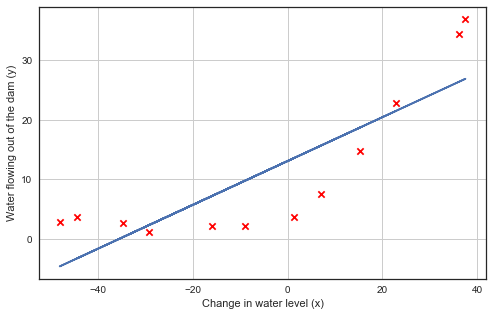

In [283]:
minimize = optimum(initialTheta, x, y, y.shape[0], 0)
plotData(x, y)
plt.plot(x[:, 1:], hypothesis(minimize.x, x))

In [284]:
def plotLearningCurves (theta, x, y, xval, yval, λ):
    errorTrain = []
    errorVal = []
    for number in range(2, x.shape[0] + 1):
        xTrain = x[:number, :]
        yTrain = y[:number]
        thetaFit = optimum(theta, xTrain, yTrain, yTrain.shape[0], λ).x
        costTrain = regularizedCostFunction(thetaFit, xTrain, yTrain, yTrain.shape[0], λ)
        costVal = regularizedCostFunction(thetaFit, xval, yval, yval.shape[0], λ)
        errorTrain.append(costTrain)
        errorVal.append(costVal)
    errorTrain = np.array(errorTrain).flatten()
    errorVal = np.array(errorVal).flatten()
    plt.figure(figsize = (8, 5))
    plt.plot(errorTrain, label = 'trainset')
    plt.plot(errorVal, label = 'validationset')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)
    plt.legend(fontsize = 'large')

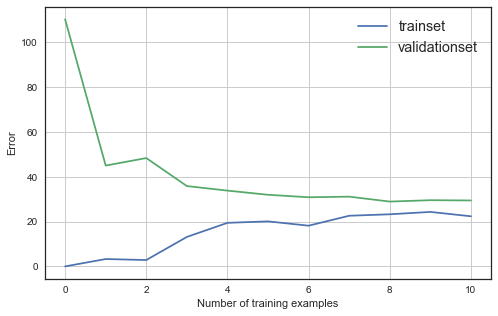

In [285]:
plotLearningCurves(initialTheta, x, y, xval, yval, 0)

In [286]:
def polynomialRegression (x, number):
    polynimailx = x.copy()
    for n in range(2, number + 1):
        polynimailx = np.append(polynimailx, np.power(x[:, 1:], n), axis = 1)
    return polynimailx

In [287]:
polyx = polynomialRegression(x, 5)

In [288]:
def featureNormalized (x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0, ddof = 1)
    x = np.subtract(x, mean)
    x = np.divide(x, std)
    x[:, :1] = 1
    return x

In [289]:
normalizedPolyx = featureNormalized(polyx)

In [290]:
thetaOptimumPoly = optimum(np.ones((1, 6)), normalizedPolyx, y, y.shape[0], 0).x
xvals = np.linspace(-55, 55, 50)
xmat = np.column_stack((np.ones((50, 1)), xvals))
xmat = polynomialRegression(xmat, 5)
xmat -= np.mean(polyx, axis = 0)
xmat /= np.std(polyx, axis = 0, ddof = 1)
xmat[:, :1] = 1

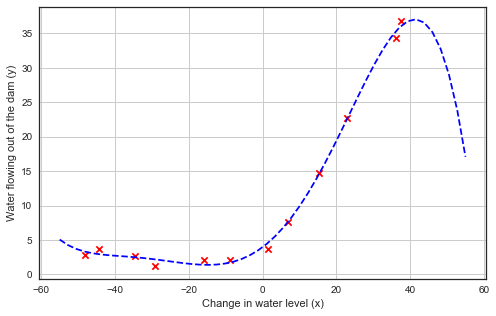

In [291]:
plotData(x, y)
plt.plot(xvals, hypothesis(thetaOptimumPoly, xmat), 'b--')

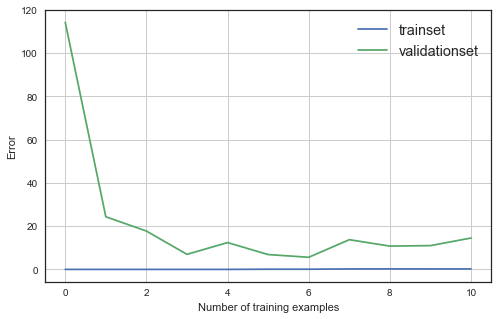

In [292]:
polyxval = polynomialRegression(xval, 5)
normalizedpolyxval = featureNormalized(polyxval)
plotLearningCurves(np.ones((1, 6)), normalizedPolyx, y, normalizedpolyxval, yval, 0)

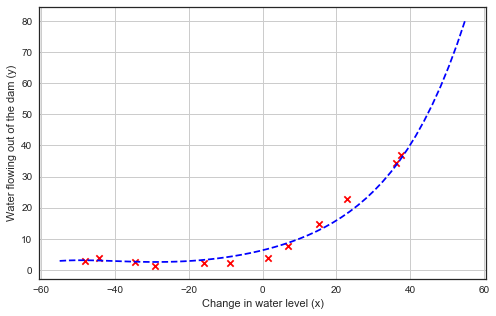

In [293]:
theta1 = optimum(np.ones((1, 6)), normalizedPolyx, y, y.shape[0], 1).x
plotData(x, y)
plt.plot(xvals, hypothesis(theta1, xmat), 'b--')

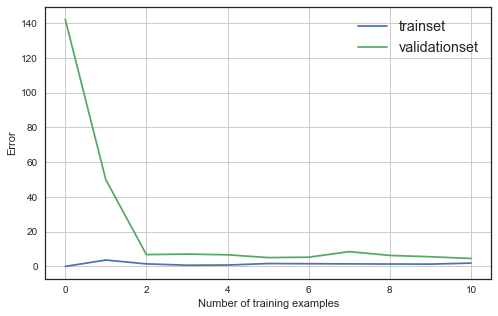

In [294]:
plotLearningCurves(np.ones((1, 6)), normalizedPolyx, y, normalizedpolyxval, yval, 1)

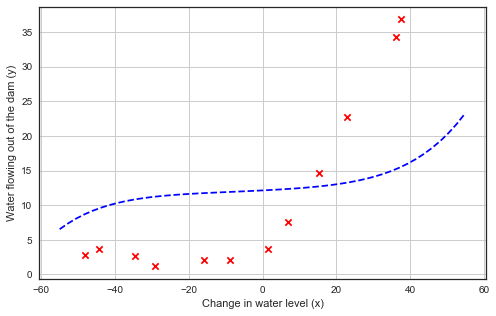

In [295]:
theta2 = optimum(np.ones((1, 6)), normalizedPolyx, y, y.shape[0], 100).x
plotData(x, y)
plt.plot(xvals, hypothesis(theta2, xmat), 'b--')

In [296]:
def trainLinearReg (theta, x, y, xval, yval):
    errorTrain = []
    errorVal = []
    lambdas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    for λ in lambdas:
        xTrain = x
        yTrain = y
        thetaFit = optimum(theta, xTrain, yTrain, yTrain.shape[0], λ).x
        costTrain = regularizedCostFunction(thetaFit, xTrain, yTrain, yTrain.shape[0], λ)
        costVal = regularizedCostFunction(thetaFit, xval, yval, yval.shape[0], λ)
        errorTrain.append(costTrain)
        errorVal.append(costVal)
    errorTrain = np.array(errorTrain).flatten()
    errorVal = np.array(errorVal).flatten()
    plt.figure(figsize = (8, 5))
    plt.plot(lambdas, errorTrain, label = 'Trainset')
    plt.plot(lambdas, errorVal, label = 'Cross_Validationset')
    plt.xlabel('Lambda')
    plt.ylabel('Error')
    plt.grid(True)
    plt.legend(fontsize = 'large')

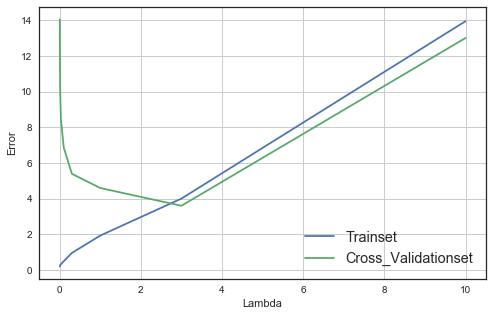

In [297]:
trainLinearReg(np.ones((1, 6)), normalizedPolyx, y, normalizedpolyxval, yval)

8.23929617564


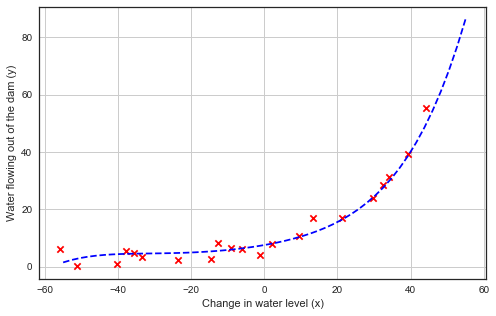

In [299]:
#polyx = polynomialRegression(x, 7)
#normalizedPolyx = featureNormalized(polyx)
polyxtest = polynomialRegression(xtest, 5)
normalizedpolyxtest = featureNormalized(polyxtest)
finalTheta = optimum(np.ones((1, 6)), normalizedPolyx, y, y.shape[0], 3).x
print(regularizedCostFunction(finalTheta, normalizedpolyxtest, ytest, ytest.shape[0], 3))
plotData(xtest, ytest)
plt.plot(xvals, hypothesis(finalTheta, xmat), 'b--')